<a href="https://colab.research.google.com/github/Tirta2241720045/Machine_Learning/blob/main/Week5(P5)(GC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Required Libraries
from pathlib import Path # Path manipulation
import matplotlib.image as mpimg # Image reading
import matplotlib.pyplot as plt # Plotting
import cv2 # Image manipulation
import random # Random number generation
import numpy as np # Array manipulation
import pandas as pd # Data manipulation

ModuleNotFoundError: No module named 'cv2'

In [5]:
# Image directories
train_dir = "/content/drive/MyDrive/dataset/images/training" # Training directory
test_dir = "/content/drive/MyDrive/dataset/images/test" # Testing directory

In [6]:
def load_dataset(img_dir): # Load dataset
    p = Path(img_dir) # Path object
    dirs = p.glob('*') # Iterate through all the files in the

    img_list = [] # List to store image data

    for dir in dirs: # Iterate through all the files in the directory
        label = str(dir).split('/')[-1] # Get the label of the image
        for file in dir.glob('*.jpg'): # Iterate through all the files in the directory
            img = mpimg.imread(file) # Read the image 

            if not img is None: # If the image is not empty
                img_list.append((img, label)) # Append the image and the label to the list

    return img_list     # Return the list

In [7]:
# Load training data
train_img = load_dataset(train_dir) # Load training data

In [8]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))  # Pick a random image

# Check img size
print(f'Image {pick_random}') # Print the image number
print(train_img[pick_random][0].shape) # Print the image size

Image 77
(555, 800, 3)


In [9]:
# Function to Visualize
def random_img_viz(img_list): # Function to visualize random images
    rand_num = np.random.randint(0, len(img_list)) # Pick a random number

    img = img_list[rand_num][0] # Get the image
    label = img_list[rand_num][1] # Get the label
    label_str = 'day' if label == 1 else 'night' # Convert the label to string

    plt.imshow(img) # Show the image 
    print(f'Shape\t: {img.shape}')  # Print the image shape
    print(f'Label\t: {label}')  # Print the label

Shape	: (458, 800, 3)
Label	: night


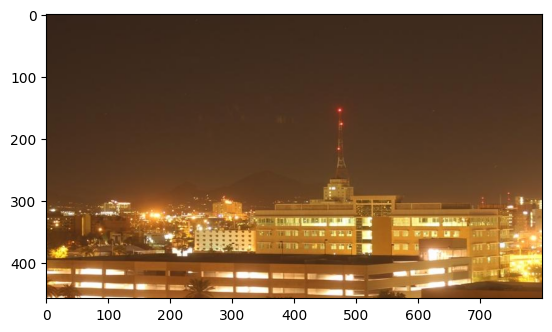

In [10]:
random_img_viz(train_img) # Visualize random image

In [11]:
def standarized_input(image): # Standarized
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600)) # Resize the image

    return std_img # Return the image

In [12]:
def label_encoder(label):  
    # Encode the label
    # day as 1; night as 0
    num_val = 0 # Initialize the number value

    if(label == 'day'): # If the label is day
        num_val = 1 # Set the number value to 1

    return num_val # Return the number value

In [13]:
def preprocess(img_list): # Preprocess the image list
    std_img_list = [] # Initialize the list

    for item in img_list: # Iterate through the image list
        image = item[0] # Get the image
        label = item[1] # Get the label

        # Standarized the image
        std_img = standarized_input(image) # Standarized the image

        # Create the label
        img_label = label_encoder(label) # Encode the label

        std_img_list.append((std_img, img_label)) # Append the standarized image and the label to the list

    return std_img_list  # Return the list

In [14]:
train_std_img_list = preprocess(train_img) # Preprocess the training image

In [15]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list)) # Pick a random image

# Check img size
print(f'Image {pick_random}')   # Print the image number
print(train_std_img_list[pick_random][0].shape) # Print the image size

Image 221
(600, 1100, 3)


Shape	: (600, 1100, 3)
Label	: 0


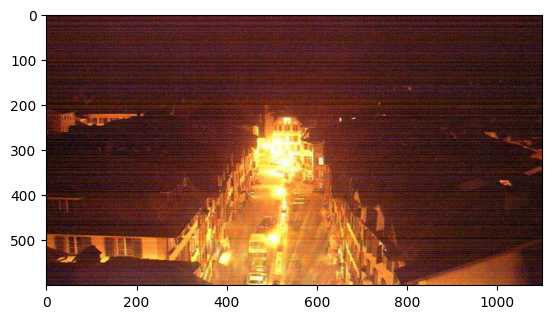

In [16]:
random_img_viz(train_std_img_list)  # Visualize random image

In [17]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):  # Get the average brightness of the image
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)    # Convert the image to HSV

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]  # Calculate the area of the image
    avg = sum_brightness / area # Calculate the average brightness

    return avg  # Return the average brightness

Image 76
Avg Brighness: 109.4562


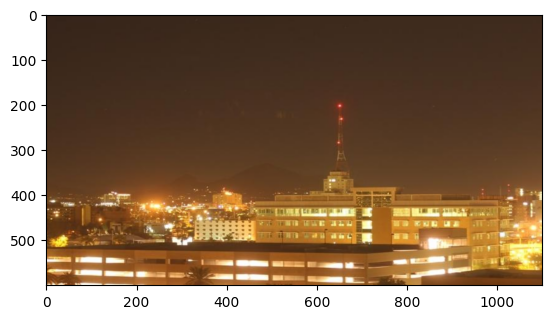

In [18]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))    # Pick a random image

feature_img = train_std_img_list[rand_img][0]   # Get the image

avg_img = avg_brightness(feature_img)   # Get the average brightness of the image

print(f'Image {rand_img}')  # Print the image number
print(f'Avg Brighness: {avg_img:.4f}')  # Print the average brightness
plt.imshow(feature_img) # Show the image

In [19]:
def predict_label(img, threshold):  # Predict the label based on the average brightness
    # Computer average brightness
    avg = avg_brightness(img)   # Get the average brightness
    pred = 0    # Initialize the prediction

    # Predict the label based on user defined threshold
    if avg > threshold: # If the average brightness is greater than the threshold
        pred = 1    # Set the prediction to 1

    return pred # Return the prediction

Image 32
Actual label: 0
Predicted label: 0


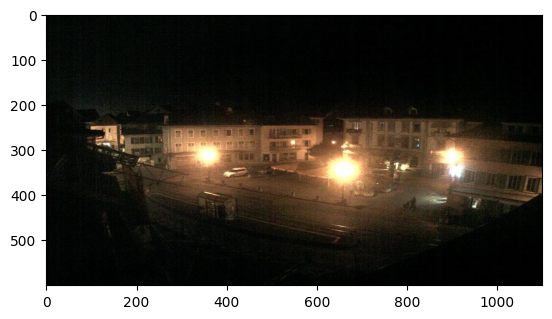

In [20]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))    # Pick a random image

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)    # Predict the label

# Evaluate
print(f'Image {rand_img}')  # Print the image number
print(f'Actual label: {train_std_img_list[rand_img][1]}')   # Print the actual label
print(f'Predicted label: {pred}')   # Print the predicted label
plt.imshow(train_std_img_list[rand_img][0])   # Show the image

In [21]:
def evaluate(img_list, threshold):  # Evaluate the model
    miss_labels = []    # Initialize the list

    for file in img_list:   # Iterate through the image list
        # Get the ground truth / correct label
        img = file[0]   # Get the image
        label = file[1] # Get the label

        # Get prediction
        pred_label = predict_label(img, threshold)  # Predict the label

        # Compare ground truth and pred
        if pred_label != label:   # If the prediction is wrong
            miss_labels.append((img, pred_label, label))    # Append the image, prediction, and label to the list

    total_img = len(img_list)   # Get the total number of images
    corr_pred = total_img - len(miss_labels)        # Get the number of correct predictions
    accuracy = corr_pred / total_img    # Calculate the accuracy

    print(f'Accuracy: {accuracy:.4f}')  # Print the accuracy

In [22]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120) # Evaluate the model

Accuracy: 0.8417


In [23]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)   # Load the test data

# Preprocess
test_std_img_list = preprocess(test_img)    # Preprocess the test data

# Predict
evaluate(test_std_img_list, threshold=120)  # Evaluate the model

Accuracy: 0.8688


In [24]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):   # Extract the average brightness feature
    avg_list = []   # Initialize the list
    labels = []    # Initialize the list

    for img in img_list:    # Iterate through the image list
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)    # Append the average brightness to the list
        labels.append(img_label)    # Append the label to the list

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))  # Stack the data
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])   # Create a dataframe

    return df   # Return the dataframe

In [25]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)  # Extract the average brightness feature
print(f'Shape: {train_avg_img.shape}')  # Print the shape of the dataframe
train_avg_img.head()    # Show the first 5 rows of the dataframe

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,114.316139,0.0
1,13.972930,0.0
2,25.773092,0.0
3,109.477339,0.0
4,113.241642,0.0


In [26]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)    # Extract the average brightness feature
print(f'Shape: {test_avg_img.shape}')   # Print the shape of the dataframe
test_avg_img.head() # Show the first 5 rows of the dataframe

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,12.978200,0.0
1,51.373026,0.0
2,47.079873,0.0
3,26.358703,0.0
4,89.018533,0.0


In [27]:
# import requied library
from sklearn.svm import SVC # Support Vector Classifier

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)      # Get the feature
y_train = train_avg_img.iloc[:,1]       # Get the label
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)    # Get the feature
y_test = test_avg_img.iloc[:,1]    # Get the label

model = SVC()   # Initialize the model
model.fit(X_train, y_train) # Fit the model

SVC()

In [28]:
from sklearn.metrics import accuracy_score  # Import accuracy score

# Make a prediction on train data
y_train_pred = model.predict(X_train)   # Predict the label

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)   # Calculate the accuracy

# Make a prediction on test data
y_test_pred = model.predict(X_test) # Predict the label

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)  # Calculate the accuracy

# Print Eval Result
print(f'Accuracy on train: {acc_train}')    # Print the accuracy on train data
print(f'Accuracy on test: {acc_test}')  # Print the accuracy on test data

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9
